# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 18 - 1er bimestre 2025


Este primer TP comienza desde el día después de la clase 2 (12 de marzo) y la ventana de entrega estará abierta hasta las **23hs del lunes 7 de abril (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un link a un notebook de google colab (permitir acceso a gerardo.vilcamiza@ieee.org y gvilcamiza.ext@fi.uba.ar) y **se realizará en el siguiente link de google forms: [link](https://forms.gle/ViVSD2CG8TcrZ9wBA)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co18.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.

# **PREGUNTA 1**

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sean los mismo valores solo que con el signo cambiado, por ejemplo `ini=-3 , fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### 1b) Implementación de Adam (1.5 puntos)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Comparar el resultado y rendimiento de Adam VS GD para cada learning rate.

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### 1c) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de ambos optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1hiLnMm7ooBj-wJdz0F4vpvjx9DcEgAkg/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.


### 2a) EDA y preparación del dataset (2 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a una categoría: "Casual" (gasta menos de 5000), "Gama media" (gasta entre 5000 y 10000), "Fiel" (gasta entre 10000 y 15000) o a "Premium" (gasta más de 15000).

### 2b) Benchmark de modelos de ML clásico  (1 punto)
Definir uno o varios puntos de comparación (benchmark) para comparar entre sí al menos 2 modelos distintos. Estos deben ser modelos de ML clásico de la librería `sklearn` de fácil y rápido entrenamiento.

### 2c) Modelo de deep leaning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones de la función de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

### 2d) Modelo de deep leaning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la función de costo y la métrica de validación. Explicar el proceso de iteración utilizado para conseguir los resultados y justificar los resultados obtenidos. **Comparar contra el modelo sin embeddings**.
Recordar que tanto para el punto 2c) como el 2d) pueden usarse herramientas como regularización y prueba de hiperpametros para conseguir mejores resultados.

### 2e) Encontrar usuarios similares (0.5 puntos)
Para el modelo del punto 2c) implementar una función que reciba un id de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar.

# **RESOLUCIÓN**

----
Autor:      **Braian A. Desía**

E-mail:     b.desia@hotmail.com

Nº SIU:     a1803

## PREGUNTA 1

### 0. PRELIMINAR

#### 0.1. LIBRERÍAS

In [1]:
# For data manipulation
import numpy as np

# For visualization
import matplotlib.pyplot as plt

# For models
from sklearn.model_selection import train_test_split

# For warnings
import warnings


#### 0.2. GENERACIÓN SINTÉTICA DE DATOS

Primeramente, analizamos la función de activación que vamos a emplear.

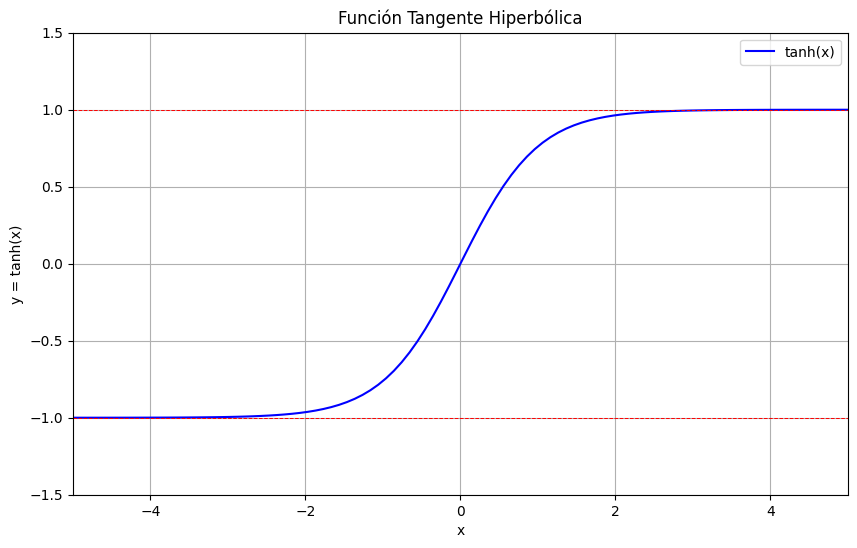

In [2]:
x = np.linspace(-5, 5, 100)     # Rango de valores
y = np.tanh(x)                  # Tangente hiperbólica

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='tanh(x)', color='blue')
plt.axhline(1, color='red', linestyle='--', lw=0.7)  # Asintota y=1
plt.axhline(-1, color='red', linestyle='--', lw=0.7) # Asintota y=-1
plt.title('Función Tangente Hiperbólica')
plt.xlabel('x')
plt.ylabel('y = tanh(x)')
plt.grid()
plt.legend()
plt.ylim(-1.5, 1.5)
plt.xlim(-5, 5)
plt.show()

**OBSERVACIONES**
- La imagen de la función esta definida entre (-1, 1). En nuestro caso, al emplear una sola capa de una sola neurona, esto implica una limitación muy fuerte, pues nuestra red neuronal será incapaz de reproducir valores por fuera de ese rango sea cual sean los pesos y el bias.
- La función es impar o antisimétrica respecto del eje "y" en x=0. Esto, a priori, no representaría una limitación, pues los pesos y el bias pueden transformar linealmente los valores de entrada como para que nuestro output no sea necesariamente antisimétrico en x=0.
- La función tanh es aproximadamente un recta en el rango y=(-0.5, 0.5). Nuestra red podría ser útil para modelar una recta comprendida en esos valores.


Generamos nuestros datos sinteticos con esas consideraciones. Adoptamos una función sigmoide. Esta función, por definición, esta contenida entre (0,1), por lo que, aplicamos una transformación lineal para ampliar su imagen al rango (-1,1) y le damos ruido gaussiano. Además también desplazamos en "x" su origen.

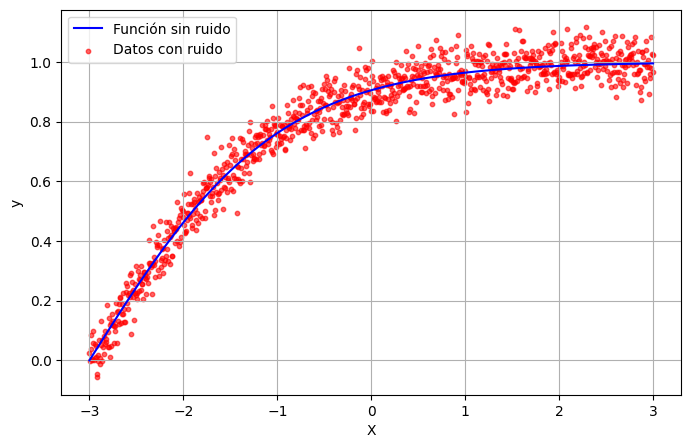

In [3]:
# Parámetros
ndata = 1000
initial = -3
final = -initial

rnd_seed = 42

# Feature data
X_data = np.linspace(initial, final, ndata)

# Non-linear function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def img_sc_sigmoid(x, yi, yf, dx):
    return (yf-yi) * sigmoid(x+dx) + yi

# Generar datos sin ruido
y_smoothed = img_sc_sigmoid(X_data, -1, 1, -initial)

# Agregar ruido gaussiano
np.random.seed(rnd_seed)            # Fijar la semilla para reproducibilidad
noise_std = 0.05                   # Ajusta la desviación estándar del ruido
y_noise = np.random.normal(0, noise_std, ndata)

# Datos finales con ruido
y_data = y_smoothed + y_noise

# Visualización
plt.figure(figsize=(8, 5))
plt.plot(X_data, y_smoothed, label='Función sin ruido', color='blue')
plt.scatter(X_data, y_data, label='Datos con ruido', color='red', s=10, alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


Ha sido importante seleccionar el intervalo en X en el cual se encuentra definido nuestro data. Pues es de notar, que la función rápidamente se hacer asintóticamente al valor 1. De este modo, conforme más extendemos nuestro intervalo en X, más valores cercanos a 1 tendremos. Esto podría resultar en que la mejor solución termine siendo una recta practicamente horizontal, pues el peso de los valores menores a 1 conforme el intervalo de X crece, disminuye notablemente. Por inspección, el intervalo [-3, 3] representa un balance adecuado.

### 1. IMPLEMENTACIÓN ALGORITMOS GRADIENT-DESCENT Y ADAM

In [4]:
class SimpleNeuralNetwork:
    # Configuración inicial para todos los métodos de la clase
    def __init__(self, n_input=1, n_output=1):
        self.weights = np.random.rand(n_input, n_output) - 0.5
        self.bias = np.random.rand(1, n_output) - 0.5

        self.activation_fun = None
        self.activation_der = None

        self.loss_fun = None
        self.loss_der = None

        self.learning_rate = None
        self.epochs = None
        self.batch_size = None

        self.error_history = None
        self.last_epoch = None
        self.info = False

        self.fit_monitor = False
        self.param_history = None

        self.adaptive_lr = False
        self.lr_history = None

    def activation(self, fun, fun_der):
        self.activation_fun = fun
        self.activation_der = fun_der

    def loss(self, fun, fun_der):
        self.loss_fun = fun
        self.loss_der = fun_der

    def forward(self, X):
        return self.activation_fun(np.dot(X.reshape(-1,1), self.weights) + self.bias)

    def compute_gradients(self, X_batch, y_batch, y_pred_batch):
        """Calcula los gradientes de la función de pérdida con respecto a los parámetros para una sola neurona."""
        dloss = self.loss_der(y_batch, y_pred_batch.reshape(-1))
        dhdz = self.activation_der(self.forward(X_batch)).reshape(-1)
        dzdw = X_batch.T

        grad_w = (dloss * dhdz * dzdw).mean(axis=1)     # Promedio de todo el batch sobre cada wi
        grad_b = (dloss * dhdz).mean()                  # Promedio de todo el batch sobre el bias

        return grad_w, grad_b

    def fit(self, X_train, y_train, X_val, y_val, early_stopping_tol = 1e-4, early_stopping_pacience = None, method='gd'):
        """Entrena la red neuronal usando Gradient Descent o Adam."""

        n_samples = X_train.shape[0]

        # Set default parameters if they are not specified
        if self.learning_rate is None:
            self.learning_rate = 0.01

        if self.epochs is None:
            self.epochs = 1e4

        if self.batch_size is None:
            self.batch_size = n_samples

        if early_stopping_pacience is None:
            early_stopping_pacience = self.epochs

        # Make sure that the batch size is less than the available training data
        if self.batch_size > n_samples:

            self.batch_size = n_samples
            warnings.warn('The specified batch size exceeds the available train data. The full train set will be used.')

        self.param_history = []
        self.train_error_history = []
        self.val_error_history = []
        self.lr_history = [self.learning_rate]
        pacience_count = 0
        epoch = 0

        lr = self.learning_rate

        if method == 'adam':
            m_w, m_b = 0, 0  # First moment
            v_w, v_b = 0, 0  # Second moment
            beta1, beta2 = 0.9, 0.999
            epsilon = 1e-8

        if self.fit_monitor:
            self.param_history.append((self.weights[0,0], self.bias[0,0]))

        while epoch < self.epochs and pacience_count <= early_stopping_pacience:

            if self.adaptive_lr:
                weights_old = self.weights.copy()
                bias_old = self.bias.copy()
                param_history_old = self.param_history.copy()

                train_error_history_old = self.train_error_history.copy()
                val_error_history_old = self.train_error_history.copy()


            # Shuffle the data
            shuffle_index = np.random.permutation(n_samples)
            X_shuffled = X_train[shuffle_index]
            y_shuffled = y_train[shuffle_index]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Forward pass
                y_pred = self.forward(X_batch)

                # Compute gradients
                grad_w, grad_b = self.compute_gradients(X_batch, y_batch, y_pred)

                # Update parameters
                if method == 'gd':
                    delta_w = grad_w
                    delta_b = grad_b
                if method == 'adam':
                    # Update moments
                    m_w = beta1 * m_w + (1-beta1) * grad_w          # First moment
                    m_b = beta1 * m_b + (1-beta1) * grad_b
                    v_w = beta2 * v_w + (1-beta2) * (grad_w ** 2)   # Second moment
                    v_b = beta2 * v_b + (1-beta2) * (grad_b ** 2)

                    # Bias correction
                    m_w_hat = m_w / (1 - beta1 ** (epoch + 1))      # First moment
                    m_b_hat = m_b / (1 - beta1 ** (epoch + 1))
                    v_w_hat = v_w / (1 - beta2 ** (epoch + 1))      # Second moment
                    v_b_hat = v_b / (1 - beta2 ** (epoch + 1))

                    delta_w =  m_w_hat / (np.sqrt(v_w_hat) + epsilon)
                    delta_b =  m_b_hat / (np.sqrt(v_b_hat) + epsilon)

                if self.adaptive_lr:
                    grad_mod = np.linalg.norm(np.vstack((delta_w, np.array([[delta_b]]))))      # Gradient modulus
                    delta_w /= grad_mod         # Normalized weigths gradient
                    delta_b /= grad_mod         # Normalized bias gradient

                self.weights -= lr * delta_w
                self.bias -= lr * delta_b

                if self.fit_monitor:
                    self.param_history.append((self.weights[0,0], self.bias[0,0]))

            # Get prediction for entire train set (only if batch_size < n_samples)
            if self.batch_size < n_samples:
                y_pred = self.forward(X_train)

            # Calculate error for entire train set
            train_epoch_error = self.loss_fun(y_train, y_pred)
            self.train_error_history.append(train_epoch_error)

            # Get predict for entire validation set
            y_val_pred = self.forward(X_val)

            # Calculate error for entire validation set
            val_epoch_error = self.loss_fun(y_val, y_val_pred)
            self.val_error_history.append(val_epoch_error)

            if self.info and epoch % 100 == 0:
                print(f'Epoch {epoch}: Train Error = {train_epoch_error}, Validation error = {val_epoch_error}')

            # Calculate relative error between epochs for validation set and reinit/update pacience counter
            if epoch > 0:
                delta_epoch_error = self.val_error_history[epoch - 1] - self.val_error_history[epoch]
                relative_epoch_error = delta_epoch_error / self.val_error_history[epoch - 1]
                if relative_epoch_error >= early_stopping_tol:
                    pacience_count = 0
                else:
                    pacience_count += 1

                # Adaptive learning rate
                # Criteria: if between two consecutive epochs, epoch error decreases, then increment learning rate by 1.20. Otherwise, divided by 2.
                if self.adaptive_lr:
                    if delta_epoch_error > 0:           # Increase learning rate and go to next step
                        lr *= 1.2
                        self.lr_history.append(lr)
                    else:                               # Decrease learning rate and restart current step
                        lr *= 0.5
                        epoch -= 1
                        self.weights = weights_old.copy()
                        self.bias =  bias_old.copy()
                        self.param_history = param_history_old.copy()

                        self.train_error_history = train_error_history_old.copy()
                        self.val_error_history = val_error_history_old.copy()

            epoch += 1

        self.last_epoch = epoch - 1

        if self.info:
            print(f'Final Epoch {epoch - 1}: Error = {self.val_error_history[-1]}')

    def predict(self, X):
        """Realiza predicciones sobre nuevos datos."""
        return self.forward(X)

In [5]:
# Split the dataset
rnd_seed = 42   # For reproducibility
ftest = 0.20    # Data fraction for testing
fval = 0.20     # Data fraction for validation

X_train_val, X_test, y_train_val, y_test = train_test_split(
                                                    X_data, y_data,
                                                    test_size=ftest,
                                                    random_state=rnd_seed
                                                    )

X_train, X_val, y_train, y_val = train_test_split(
                                                    X_train_val, y_train_val,
                                                    test_size=fval/(1-ftest),
                                                    random_state=rnd_seed
                                                    )

print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_val:",X_val.shape)
print("Valores de y_val:",y_val.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (600,)
Valores de y_train: 600
Dimension de X_val: (200,)
Valores de y_val: 200
Dimension de X_test: (200,)
Valores de y_test: 200


In [6]:
# Función de activación tanh
def tanh(x):
    return np.tanh(x)

# Derivada de la función tanh
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Función de costo (Error cuadrático medio)
def mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Derivada de la Función de costo (Error cuadrático medio)
def mse_derivative(y_true, y_pred):
    return  y_pred - y_true

# Model definition
snn = SimpleNeuralNetwork()
snn.activation(tanh, tanh_derivative)
snn.loss(mse, mse_derivative)

# Save initial nn parameters for comparison
w_initial = snn.weights.copy()
b_initial = snn.bias.copy()

# Define auxiliary function for recurrent calculations
def make_SNNruns(X_train, y_train, X_val, Y_val, alphas, method, early_stopping_pacience = None):

    w_by_alpha = []
    b_by_alpha = []
    train_error_by_alpha = []
    val_error_by_alpha = []
    pred_by_alpha = []

    for alpha in alphas:

        # Reset nn parameters to the same start point
        snn.weights = w_initial.copy()
        snn.bias = b_initial.copy()

        # Set learning rate
        snn.learning_rate = alpha

        # Training model
        snn.fit(X_train.reshape(-1, 1), y_train, X_val, Y_val, method = method, early_stopping_pacience = early_stopping_pacience)

        # Save nn parameters
        w_by_alpha.append(snn.weights.copy())
        b_by_alpha.append(snn.bias.copy())

        # Save error history
        train_error_by_alpha.append(snn.train_error_history.copy())
        val_error_by_alpha.append(snn.val_error_history.copy())

        # Make predictions
        pred_by_alpha.append(snn.predict(X_train))

    return w_by_alpha, b_by_alpha, pred_by_alpha, train_error_by_alpha, val_error_by_alpha

In [7]:
# Set some model hyperparameters
snn.epochs = 100
snn.adaptive_lr = False

# Make runnings
alphas = [0.1, 0.01, 0.001]
w_by_alpha, b_by_alpha, pred_by_alpha, test_error_by_alpha, val_error_by_alpha = make_SNNruns(X_train, y_train, X_val, y_val, alphas, method='gd')

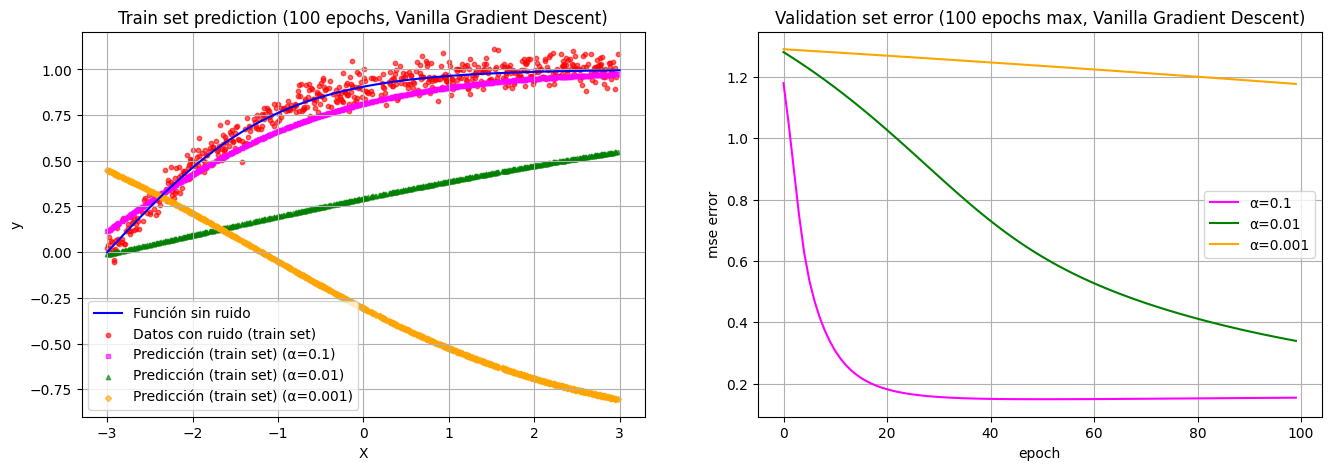

In [8]:
# Plot results
ncases = len(alphas)
colors = ['magenta', 'green', 'orange']   # Añade más colores si es necesario
markers = ['s', '^', 'D']                 # Añade más símbolos si es necesario

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(X_data, y_smoothed, label='Función sin ruido', color='blue')
axs[0].scatter(X_train, y_train, label='Datos con ruido (train set)', color='red', s=10, alpha=0.6)
for i in range(ncases):
    axs[0].scatter(X_train, pred_by_alpha[i].reshape(-1), label=f'Predicción (train set) (\u03B1={alphas[i]})', color=colors[i], s=10, alpha=0.6, marker=markers[i])
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Train set prediction (100 epochs, Vanilla Gradient Descent)')

for i in range(ncases):
    axs[1].plot(np.arange(len(val_error_by_alpha[i])), val_error_by_alpha[i], label=f'\u03B1={alphas[i]}',color=colors[i],)
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('mse error')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Validation set error (100 epochs max, Vanilla Gradient Descent)')

plt.show()

**OBSERVACIONES**
- Evidentemente, de los tres *learning rates*, el que mejor performa es el más grande. Incluso se llega a observar que se corta el entrenamiento al dispararse el *early stopping* antes de las 100 epochs.
- A medida que disminuye el *learning rate*, se requieren más epochs para lograr un error tolerable.

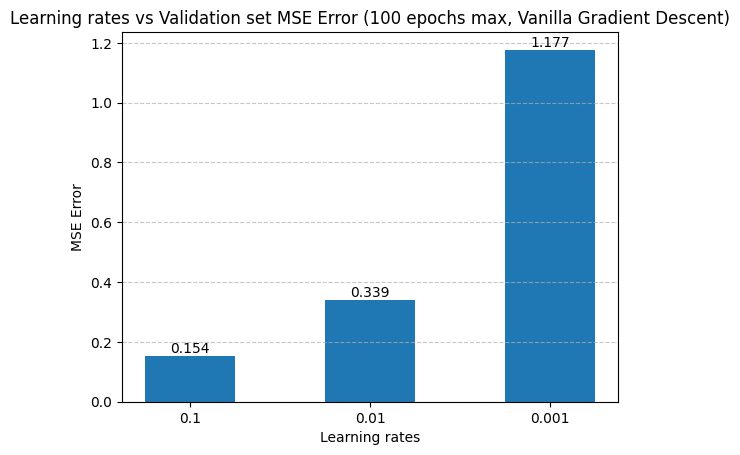

In [9]:

last_errors = [errors[-1] for errors in val_error_by_alpha]

# Convertir alphas a un array de numpy para facilitar la separación
x_positions = np.arange(len(alphas))  # Crear posiciones equidistantes para las barras

# Crear el gráfico de barras
plt.bar(x_positions, last_errors,  width=0.5)  # width controla el ancho de las barras

for i in range(len(x_positions)):
    plt.text(x_positions[i], last_errors[i] + 0.001, f'{last_errors[i]:.3f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Learning rates')
plt.ylabel('MSE Error')
plt.title('Learning rates vs Validation set MSE Error (100 epochs max, Vanilla Gradient Descent)')
plt.xticks(x_positions, alphas)  # Ajustar las etiquetas del eje X a los valores de alphas
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.show()


In [10]:
# Baseline error

y_train_true = img_sc_sigmoid(X_train, -1, 1, -initial)
mse_baseline_train = mse(y_train, y_train_true)

print("El error baseline del train set es: ", mse_baseline_train)

y_val_true = img_sc_sigmoid(X_val, -1, 1, -initial)
mse_baseline_val = mse(y_val, y_val_true)

print("El error baseline del validation set es: ", mse_baseline_val)


El error baseline del train set es:  0.002428074192984706
El error baseline del validation set es:  0.002320665333788856


In [11]:
# Make runnings
w_by_alpha, b_by_alpha, pred_by_alpha, test_error_by_alpha, val_error_by_alpha = make_SNNruns(X_train, y_train, X_val, y_val, alphas, method='adam')

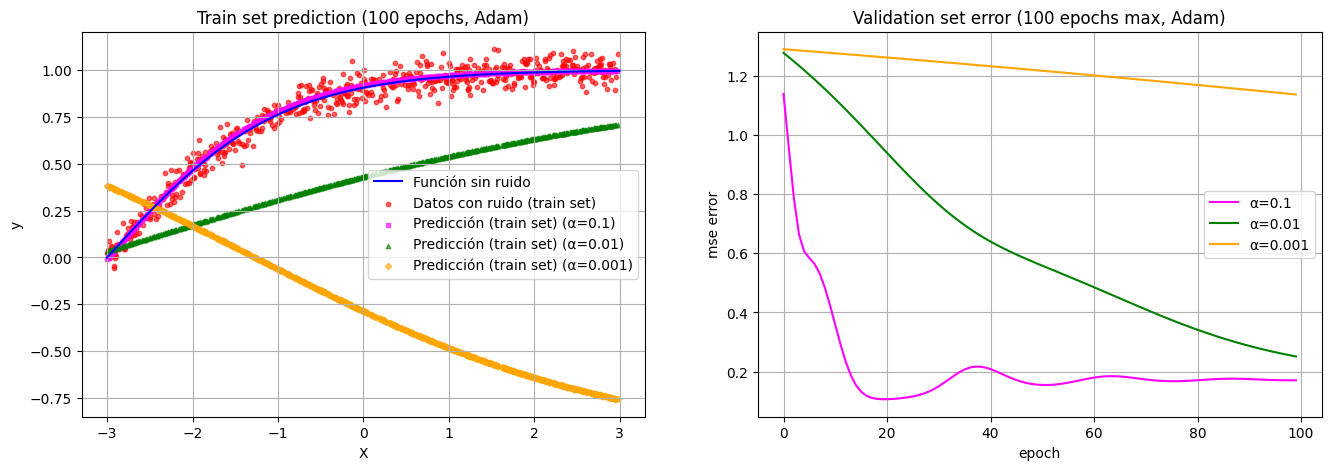

In [12]:
# Plot results
ncases = len(alphas)
colors = ['magenta', 'green', 'orange']   # Añade más colores si es necesario
markers = ['s', '^', 'D']                 # Añade más símbolos si es necesario

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(X_data, y_smoothed, label='Función sin ruido', color='blue')
axs[0].scatter(X_train, y_train, label='Datos con ruido (train set)', color='red', s=10, alpha=0.6)
for i in range(ncases):
    axs[0].scatter(X_train, pred_by_alpha[i].reshape(-1), label=f'Predicción (train set) (\u03B1={alphas[i]})', color=colors[i], s=10, alpha=0.6, marker=markers[i])
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Train set prediction (100 epochs, Adam)')

for i in range(ncases):
    axs[1].plot(np.arange(len(val_error_by_alpha[i])), val_error_by_alpha[i], label=f'\u03B1={alphas[i]}',color=colors[i],)
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('mse error')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Validation set error (100 epochs max, Adam)')

plt.show()

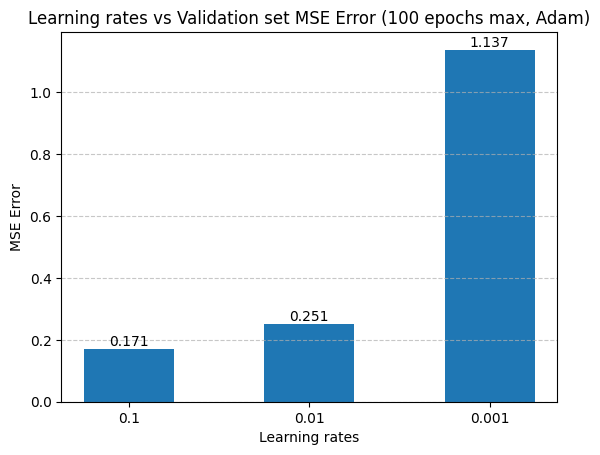

In [13]:
last_errors = [errors[-1] for errors in val_error_by_alpha]

# Convertir alphas a un array de numpy para facilitar la separación
x_positions = np.arange(len(alphas))  # Crear posiciones equidistantes para las barras

# Crear el gráfico de barras
plt.bar(x_positions, last_errors,  width=0.5)  # width controla el ancho de las barras

for i in range(len(x_positions)):
    plt.text(x_positions[i], last_errors[i] + 0.001, f'{last_errors[i]:.3f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Learning rates')
plt.ylabel('MSE Error')
plt.title('Learning rates vs Validation set MSE Error (100 epochs max, Adam)')
plt.xticks(x_positions, alphas)  # Ajustar las etiquetas del eje X a los valores de alphas
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.show()


**OBSERVACIONES**
- Se repiten las mismas conclusiones del caso anterior.

In [14]:
def loss_function(w, b, X, y_true):
    snn.weights = np.array([[w]])
    snn.bias = np.array([[b]])
    y_pred = snn.predict(X)
    return mse(y_true, y_pred)

# Generate grid
w = np.linspace(-3, 3, 100)
b = np.linspace(-3, 3, 100)
W, B = np.meshgrid(w, b)
Z = np.zeros_like(W)

# Calculate loss function for each pair of (w, b)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = loss_function(W[i, j], B[i, j], X_val, y_val)

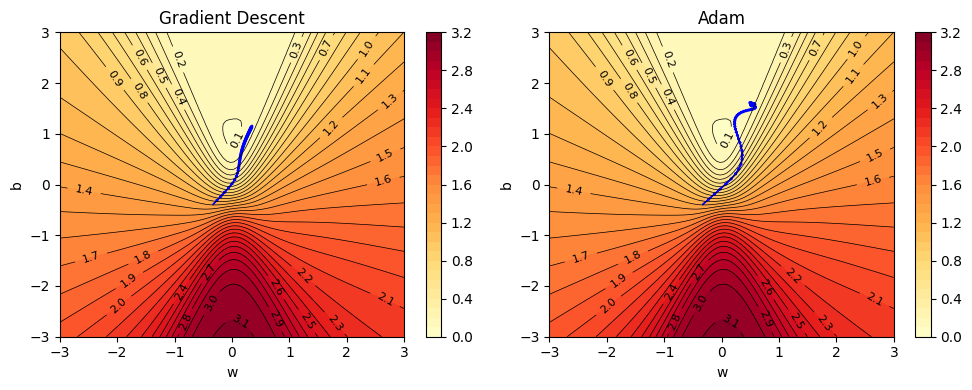

In [15]:

# Plotting function
def plot_contour(W, B, Z, points, nlevels = 30):
    plt.contourf(W, B, Z, levels=nlevels, cmap='YlOrRd')
    plt.colorbar()
    plt.xlabel('w')
    plt.ylabel('b')
    plt.title('Loss')

    CS = plt.contour(W, B, Z, levels=nlevels, colors='black', linewidths=0.5)
    plt.clabel(CS, inline=True, fontsize=8)

    for i in range(len(points) - 1):
        plt.arrow(points[i][0], points[i][1], points[i + 1][0] - points[i][0], points[i + 1][1] - points[i][1],
                  head_width=0.04, head_length=0.04, fc='blue', ec='blue')

# Initialize variables
snn.learning_rate = 0.10
snn.fit_monitor = True

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First subplot using gradient descent
snn.weights = w_initial.copy()
snn.bias = b_initial.copy()
snn.fit(X_train.reshape(-1, 1), y_train, X_test, y_test, method='gd')
points_gd = snn.param_history

plt.sca(axes[0])  # Seleccionar el primer eje
plot_contour(W, B, Z, points_gd)
plt.title("Gradient Descent")

# Second subplot using Adam optimization
snn.weights = w_initial.copy()
snn.bias = b_initial.copy()
snn.fit(X_train.reshape(-1, 1), y_train, X_test, y_test, method='adam')
points_adam = snn.param_history

plt.sca(axes[1])  # Seleccionar el segundo eje
plot_contour(W, B, Z, points_adam)
plt.title("Adam")

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

Estudiemos el efecto de tener un criterio adaptativo de *learning rate* y un *early stopping*

In [16]:
# Set some model hyperparameters
snn.adaptive_lr = True

# Make runnings
alphas = [0.1, 0.01, 0.001]
w_by_alpha, b_by_alpha, pred_by_alpha, test_error_by_alpha, val_error_by_alpha = make_SNNruns(X_train, y_train, X_val, y_val, alphas, method='gd', early_stopping_pacience = 3)

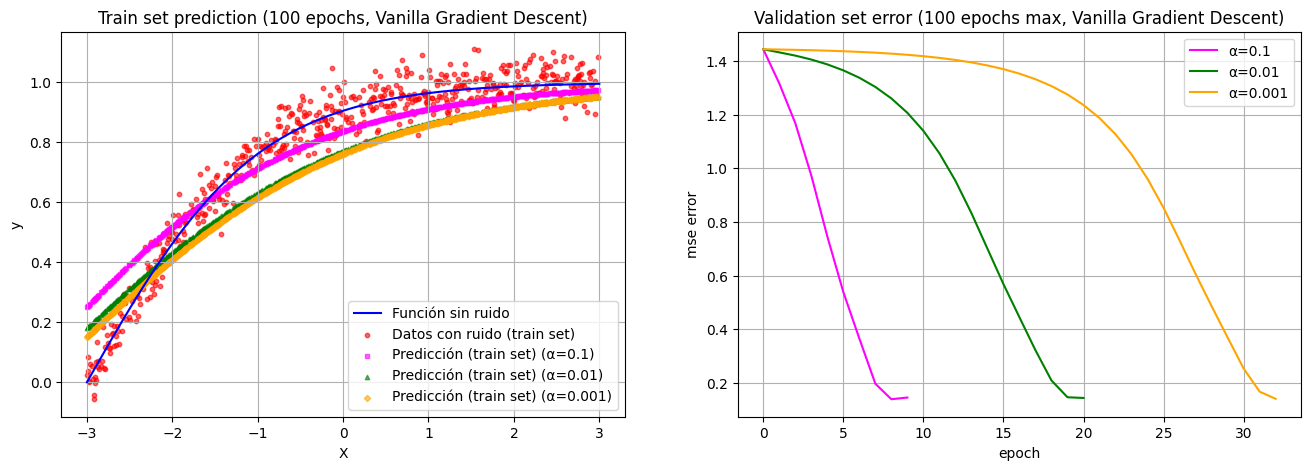

In [17]:
# Plot results
ncases = len(alphas)
colors = ['magenta', 'green', 'orange']   # Añade más colores si es necesario
markers = ['s', '^', 'D']                 # Añade más símbolos si es necesario

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(X_data, y_smoothed, label='Función sin ruido', color='blue')
axs[0].scatter(X_train, y_train, label='Datos con ruido (train set)', color='red', s=10, alpha=0.6)
for i in range(ncases):
    axs[0].scatter(X_train, pred_by_alpha[i].reshape(-1), label=f'Predicción (train set) (\u03B1={alphas[i]})', color=colors[i], s=10, alpha=0.6, marker=markers[i])
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Train set prediction (100 epochs, Vanilla Gradient Descent)')

for i in range(ncases):
    axs[1].plot(np.arange(len(val_error_by_alpha[i])), val_error_by_alpha[i], label=f'\u03B1={alphas[i]}',color=colors[i],)
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('mse error')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Validation set error (100 epochs max, Vanilla Gradient Descent)')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


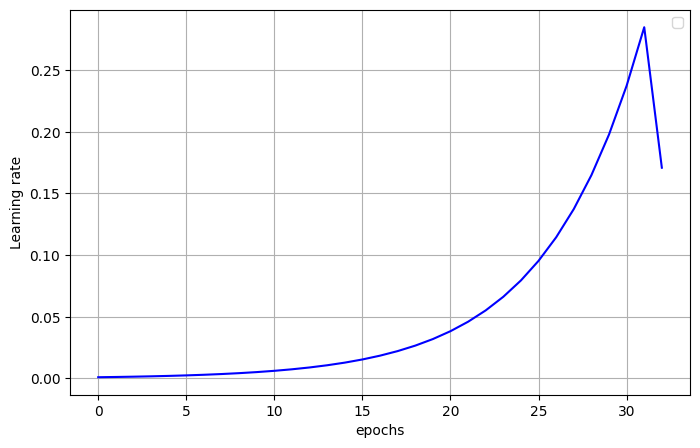

In [18]:
# Visualización
plt.figure(figsize=(8, 5))
plt.plot(range(len(snn.lr_history)), snn.lr_history, color='blue')
plt.xlabel('epochs')
plt.ylabel('Learning rate')
plt.legend()
plt.grid()
plt.show()

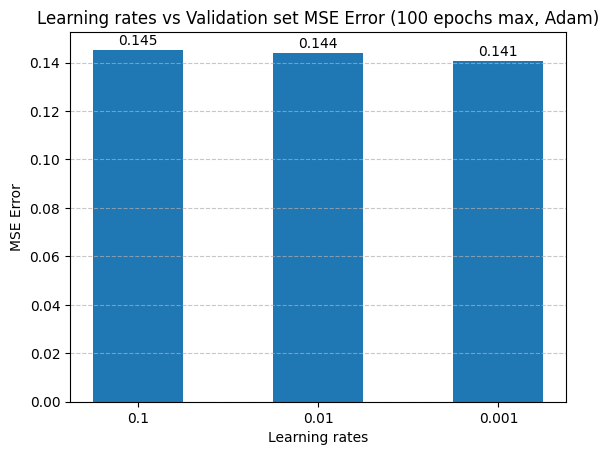

In [19]:
last_errors = [errors[-1] for errors in val_error_by_alpha]

# Convertir alphas a un array de numpy para facilitar la separación
x_positions = np.arange(len(alphas))  # Crear posiciones equidistantes para las barras

# Crear el gráfico de barras
plt.bar(x_positions, last_errors,  width=0.5)  # width controla el ancho de las barras

for i in range(len(x_positions)):
    plt.text(x_positions[i], last_errors[i] + 0.001, f'{last_errors[i]:.3f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Learning rates')
plt.ylabel('MSE Error')
plt.title('Learning rates vs Validation set MSE Error (100 epochs max, Adam)')
plt.xticks(x_positions, alphas)  # Ajustar las etiquetas del eje X a los valores de alphas
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.show()


**OBSERVACIONES**
- Mejora mucho a perfomance en términos de epochs combinando *adaptive learning* con *early stopping*.

## PREGUNTA 2

### 0. LIBRERÍAS

In [20]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For models
from sklearn.model_selection import train_test_split

# For warnings
import warnings
warnings.filterwarnings('ignore')

# For data downloading
import requests

### 1. ANÁLISIS EXPLORATORIO DE DATOS

#### 1.1 Raw data

In [21]:
# Define some auxiliary functions to download data
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params={'id': id}, stream=True)
    token = get_confirm_token(response)

    if token:
        params = {'id': id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk:
                f.write(chunk)

# Replace 'YOUR_FILE_ID' with the actual file ID from Google Drive
file_id = '1hiLnMm7ooBj-wJdz0F4vpvjx9DcEgAkg'
destination = 'dataset_black_sales.csv'

download_file_from_google_drive(file_id, destination)

In [22]:
# Leer raw data
blacksales_df = pd.read_csv('./dataset_black_sales.csv')

#### 1.2 Exploración

In [23]:
# Veamos las primeras instancias
blacksales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [24]:
blacksales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [25]:
# Y los nombres de las columnas
blacksales_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [26]:
# Veamos el número de instancias (filas) y el de features+target (columnas)
blacksales_df.shape

(550068, 12)

**OBSERVACIONES:**

- Se tiene 550068 instancias, ninguna repetida.

- El dataset tiene unas 12 columnas, de las cuales 11 corresponden a *features*
mientras que la última al *target* que define cuanto cuesta el producto.

- En nuestro caso, debemos modificar el *target* original para clasificarlo dentro de las categorías descriptas en el enunciado.

In [27]:
# Veamos si hay instancias repetidas

duplicate_rows = blacksales_df[blacksales_df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No hay instancias repetidas")
else:
    print("Instancias repetidas encontradas")
    print(duplicate_rows)

No hay instancias repetidas


In [28]:
ninstances = blacksales_df.shape[0]         # Guardamos el número de instancias
nfeatures = blacksales_df.shape[1]-1        # Guardamos el número de atributos (Descuento uno correspondiente al target)

In [29]:
# Contamos la cantidad de datos nulos por columna, expresada en términos de fracción respecto del total de instancias
df_null = blacksales_df.isnull().sum()/ninstances
df_null.sort_values(ascending=False, inplace=True)
df_null

Product_Category_3            0.696727
Product_Category_2            0.315666
User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Purchase                      0.000000
dtype: float64

**OBSERVACIONES:**

- Los atributos `Product_Category_2` y `Product_Category_3` presentan aproximadamente un 30% y un 70% de datos *missings*.

- El resto de los atributos y la variable objetivo no presentan *missings*.

In [30]:
# Veamos cuantos valores únicos hay por columna, qué valores pueden tomar y cantidad de missings.

def unique(df):
    # Initialize an empty list to store rows
    data = []

    # Loop through the columns in the dataframe
    for col in df.columns:
        # Get the number of unique values in the column
        num_unique = df[col].nunique()

        # Add the unique values as a list to the 'Unique_values' column if num_unique <= 10
        if num_unique <= 10:
            unique_vals = list(df[col].unique())
        else:
            unique_vals = "> 10 unique values"

        # Get the data type of the column
        data_type = df[col].dtype

        # Count the number of missing values in the column
        num_missing = df[col].isnull().sum()
        percent_of_missing = round((num_missing / df.shape[0]) * 100, 2)

        # Append a dictionary with the column details to the list
        data.append({
            'Column_name': col,
            'Data_type': data_type,
            'Number_of_unique': num_unique,
            'Unique_values': unique_vals,
            'Number_of_missing': num_missing,
            'percent_of_missing': percent_of_missing
        })

    # Create a dataframe from the list of dictionaries
    df_unique = pd.DataFrame(data)

    return df_unique


In [31]:
unique(blacksales_df)

,Column_name,Data_type,Number_of_unique,Unique_values,Number_of_missing,percent_of_missing
0,User_ID,int64,5891,> 10 unique values,0,0.00
1,Product_ID,object,3631,> 10 unique values,0,0.00
2,Gender,object,2,"[F, M]",0,0.00
3,Age,object,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]",0,0.00
4,Occupation,int64,21,> 10 unique values,0,0.00
5,City_Category,object,3,"[A, C, B]",0,0.00
6,Stay_In_Current_City_Years,object,5,"[2, 4+, 3, 1, 0]",0,0.00
7,Marital_Status,int64,2,"[0, 1]",0,0.00
8,Product_Category_1,int64,20,> 10 unique values,0,0.00
9,Product_Category_2,float64,17,> 10 unique values,173638,31.57


In [32]:
# Veamos algo de información estadística
blacksales_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


##### 1.2.1. Definición de columnas

Del análisis previo, podemos concluir:


| **Nombre de Columna** | **Descripción** |
| --------------- | -------------- |
| `User_ID` | Variable que identifica al usuario. |
| `Product_ID` | Variable que identifica al producto. |
| `Gender` | Variable categórica que identifica el genero del usuario. Toma dos valores: F/M. |
| `Age` | Variable categórica que identifica el rango etario. Se identifican 7 grupos. |
| `Occupation` | Máscara que identifica la ocupación. Hay 21 tipos. |
| `City_Category` | Variable categórica que indica la categoría de la ciudad actual. Hay 3 categorías: A, B, C. |
| `Stay_In_Current_City_Years` | Variable numérica que indica la cantidad de años en la ciudad actual. Toma 5 valores: 0, 1, 2, 3, 4+. |
| `Marital_Status` | Máscara que indica el estado civil. Toma 2 valores: 0 (soltero) ó 1 (casado) |
| `Product_Category_1` | Máscara que indica si el producto es categoría 1 |
| `Product_Category_2` | Máscara que indica si el producto es categoría 2 |
| `Product_Category_3` | Máscara que indica si el producto es categoría 2 |
| `Purchase` | Variable objetivo que indica el precio del producto

##### 1.2.2. Análisis de columnas

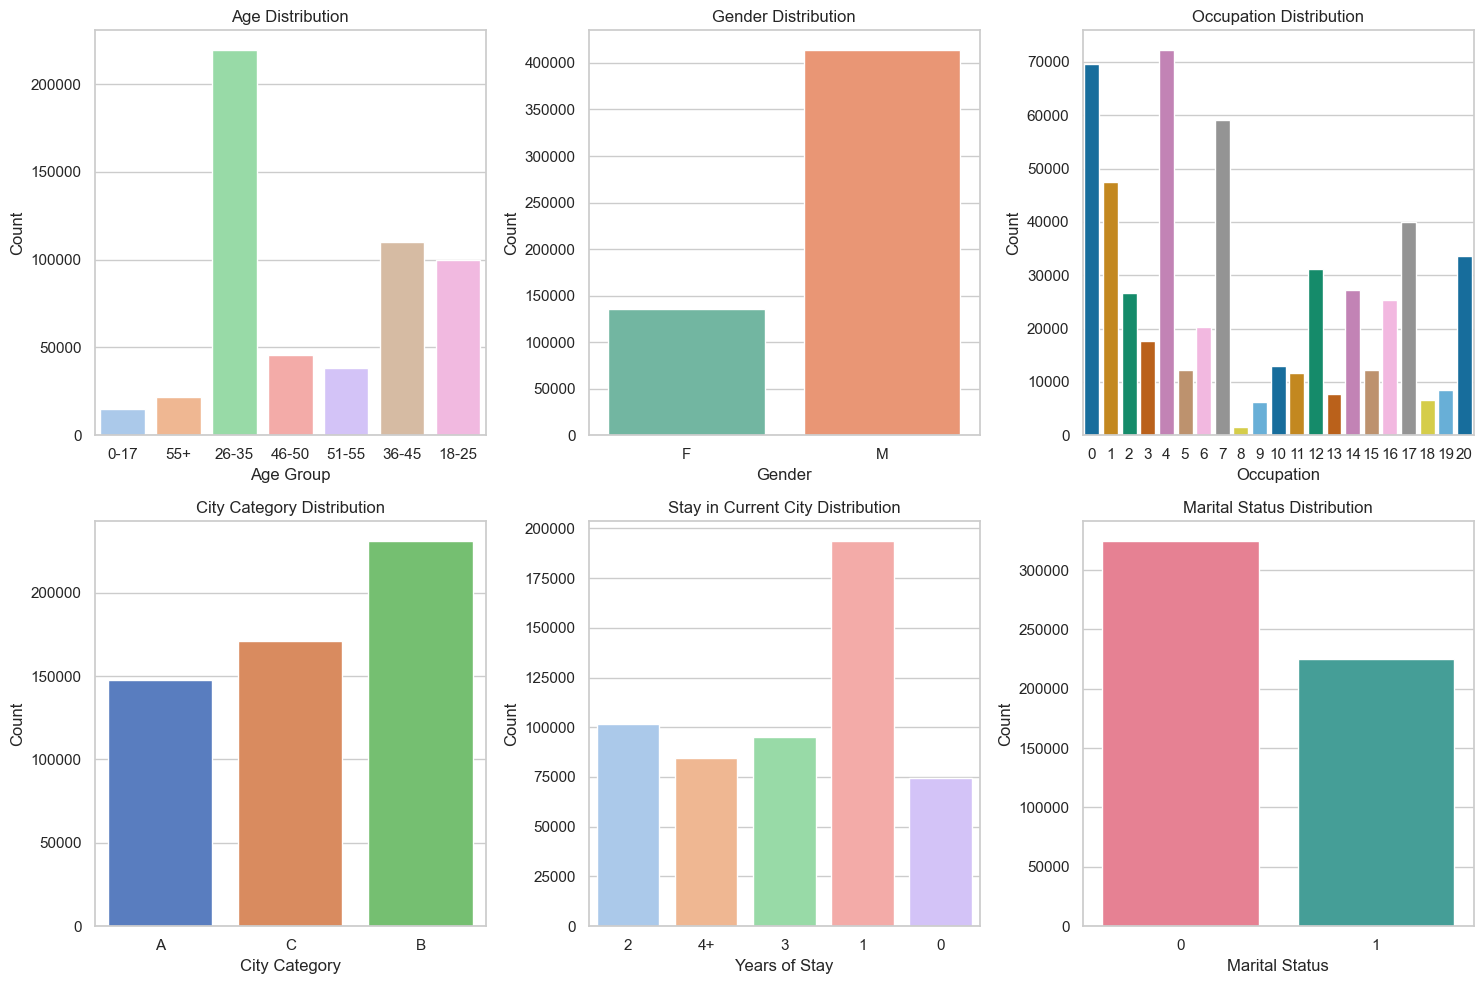

In [33]:
sns.set(style="whitegrid")  # Set the style of the plot

# Set the figure size
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Customize and create countplots
sns.countplot(x='Age', data=blacksales_df, palette='pastel', ax=axes[0, 0],
              )
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='Gender', data=blacksales_df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='Occupation', data=blacksales_df, palette='colorblind', ax=axes[0, 2])
axes[0, 2].set_title('Occupation Distribution')
axes[0, 2].set_xlabel('Occupation')
axes[0, 2].set_ylabel('Count')

sns.countplot(x='City_Category', data=blacksales_df, palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('City Category Distribution')
axes[1, 0].set_xlabel('City Category')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='Stay_In_Current_City_Years', data=blacksales_df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Stay in Current City Distribution')
axes[1, 1].set_xlabel('Years of Stay')
axes[1, 1].set_ylabel('Count')

sns.countplot(x='Marital_Status', data=blacksales_df, palette='husl', ax=axes[1, 2])
axes[1, 2].set_title('Marital Status Distribution')
axes[1, 2].set_xlabel('Marital Status')
axes[1, 2].set_ylabel('Count')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

**OBSERVACIONES:**

- Se observa que el grupo etario entre 26 y 35 es el que más compro, duplicando practicamente a los del grupo que la siguen (grupos entre 36 y 45, y entre 18 y 25). El grupo entre 18 y 45 practicamente aglutina aproximadamente el 80% de las instancias.

- Se observa que las personas masculinas compraron aproximadamente 2.5 veces más que las de género femenino.

- Las personas solteras consumieron un 50% más respecto de las casadas.

### 2. DATA TRANSFORMATION

#### 2.1. Features transformation

Se define el siguiente diagrama de trabajo para pre-procesamiento de features:

1. Sacamos los atributos `user_ID` y `Product_ID`.

1. Atributo `Gender`: se convierte la variable categórica a numérica donde "0" representa "F" y "1" representa "M".

2. Atributo `Age` planteamos un enfoque ordinal donde los rangos etarios se le asigna valor en orden lógico creciente.
    
3. Atributo `Occupation`: Convertimos variables usando One-Hot encoding.

4. Atributo `City_Category`: planteamos un enfoque ordinal asumiendo que las categorías A a C tienen un orden (ya sea creciente o decreciente).

5. Atributo `Stay_In_Current_City_Years`: En este caso, solo modificamos el valor '4+' por simplemente '4'.

6. Atributo `Product_Category_2`: Imputamos los missings usando la moda en función del rango etario y la edad.

7. Atributo `Product_Category_3`: Debido a la gran cantidad de *missings* (aprox. 70%), se descuenta directamente este atributo.


In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for converting Gender feature to binary
class GenderTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["Gender"] = X["Gender"].apply(lambda gender: 1 if gender == "M" else 0)
        return X

# Custom transformer for handling age feature with an ordinal approach
class AgeOrdinalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        age_mapping = {
            "0-17": 1,
            "18-25": 2,
            "26-35": 3,
            "36-45": 4,
            "46-50": 5,
            "51-55": 6,
            "55+": 7
        }
        
        X["Age"] = X["Age"].map(age_mapping)
        return X

# Custom transformer for handling a feature with One-Hot approach
class OneHotTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        one_hot = pd.get_dummies(X[self.column], prefix=self.column, drop_first=True, dtype=int)
        X = pd.concat([X, one_hot], axis=1).drop(self.column, axis=1)
        return X

# Custom transformer for handling City category feature with an ordinal approach
class CityCategoryOrdinalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        citycat_mapping = {
            "A": 1,
            "B": 2,
            "C": 3,
        }
        X["City_Category"] = X["City_Category"].map(citycat_mapping)
        return X

# Custom transformer for handling Stay city years feature
class StayCityYearsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Replace '4+' per '4'
        X["Stay_In_Current_City_Years"] = X["Stay_In_Current_City_Years"].replace({"4+": "4"})
        X["Stay_In_Current_City_Years"] = X["Stay_In_Current_City_Years"].astype(int)
        return X


# Custom transformer for dropping columns
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns)

class HierarchicalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.global_top = None
        self.top_by_age = None
        self.top_by_age_gender = None
        self.columns = columns

    def is_null(self, value):
        if isinstance(value, str):
            return value is None
        if isinstance(value, pd.Series) or isinstance(value, np.ndarray):
            return len(value) == 0
        else:
            return np.isnan(value)

    def safely_extract_value(self, df, key, column):
        try:
            return df[key][column]
        except KeyError:
            return np.nan

    def impute_row_hierarchicaly(
        self,
        row,
        features,
        grouped_2_levels,
        grouped_1_level,
        global_values,
        l1_group_key = "Age",
        l2_group_key = "Gender"
    ):
        for c in features:
            if not self.is_null(row[c]):
                continue

            # Intentar con el valor por Age y Gender
            imputation_value = self.safely_extract_value(grouped_2_levels, (row[l1_group_key], row[l2_group_key]), c)

            # Si no está, intentar solo por Age
            if self.is_null(imputation_value):
                imputation_value = self.safely_extract_value(grouped_1_level, row[l1_group_key], c)

            # Si aún no está, usar el valor global
            if self.is_null(imputation_value):
                imputation_value = global_values[c]

            row[c] = imputation_value

        return row

    def fit(self, X, y=None):
        # Agrupar por Edad y Género
        group_l1_l2 = lambda features: X[["Age", "Gender"] + features].groupby(["Age", "Gender"])
        group_l1 = lambda features: X[["Age"] + features].groupby(["Age"])

        # Calcular las modas por grupos
        self.top_by_age_gender = group_l1_l2(self.columns).agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        self.top_by_age = group_l1(self.columns).agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        self.global_top = X[self.columns].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

        return self

    def transform(self, X):
        X_copy = X.copy()
        top_imputer = lambda row: self.impute_row_hierarchicaly(row, self.columns, self.top_by_age_gender, self.top_by_age, self.global_top, l1_group_key = "Age", l2_group_key = "Gender")
        return X_copy.apply(top_imputer, axis=1)


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Define PIPELINE for data treatment flow
preproc_pipeline = Pipeline(steps = [
    ("drop_userID", DropColumnsTransformer(columns=["User_ID"])),                                                       # Drop categorical columns
    ("drop_prodID", DropColumnsTransformer(columns=["Product_ID"])),                                                    # Drop categorical columns
    ("gender", GenderTransformer() ),                                                                                   # Convert binary variable
    ("ageord", AgeOrdinalTransformer() ),                                                                               # Convert age range to ordinal
    ("imputer", HierarchicalImputer(columns=["Product_Category_2"])),                                                   # Missings imputation
    ("city", CityCategoryOrdinalTransformer()),
    ("city_time", StayCityYearsTransformer()),
    ("onehot_prodcat1", OneHotTransformer(column="Product_Category_1")),
    ("onehot_prodcat2", OneHotTransformer(column="Product_Category_2")),
    ("drop_prodcat3", DropColumnsTransformer(columns=["Product_Category_3"])),                                          # Drop categorical columns
    ("minmax", MinMaxScaler()),                                                                                         # Scale features
])

preproc_pipeline

Pipeline(steps=[('drop_userID', DropColumnsTransformer(columns=['User_ID'])),
                ('drop_prodID', DropColumnsTransformer(columns=['Product_ID'])),
                ('gender', GenderTransformer()),
                ('ageord', AgeOrdinalTransformer()),
                ('imputer',
                 HierarchicalImputer(columns=['Product_Category_2'])),
                ('city', CityCategoryOrdinalTransformer()),
                ('city_time', StayCityYearsTransformer()),
                ('onehot_prodcat1',
                 OneHotTransformer(column='Product_Category_1')),
                ('onehot_prodcat2',
                 OneHotTransformer(column='Product_Category_2')),
                ('drop_prodcat3',
                 DropColumnsTransformer(columns=['Product_Category_3'])),
                ('minmax', MinMaxScaler())])

#### 2.2. Target transformation

- Convertimos el target en los rangos buscados siendo 0 para < 5000, 1 para [5000, 10000), 2 [10000, 15000), y 3 > 15000.

In [36]:
# Definimos los rangos
conditions = [
    blacksales_df['Purchase'] < 5000,
    (blacksales_df['Purchase'] >= 5000) & (blacksales_df['Purchase'] < 10000),
    (blacksales_df['Purchase'] >= 10000) & (blacksales_df['Purchase'] < 15000),
    blacksales_df['Purchase'] >= 15000
]

# Los valores que corresponderán a cada condición
classes_values = [0, 1, 2, 3]

# Obtenemos la variable target a partir de la condición
blacksales_df['Purchase_range'] = np.select(conditions, classes_values)

# Cantidad de clases
nclasses = len(classes_values)

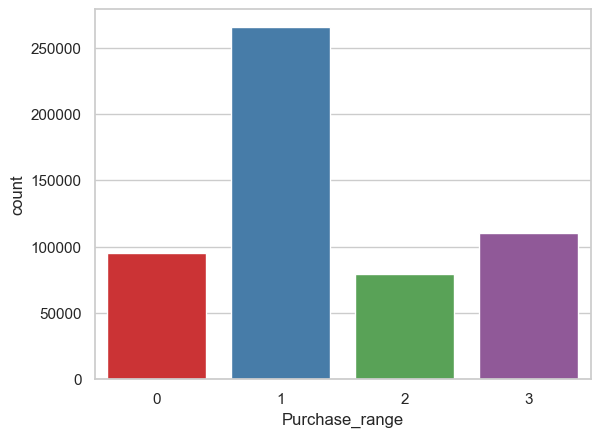

In [37]:
f, ax = plt.subplots()
ax = sns.countplot(x="Purchase_range", data=blacksales_df, palette="Set1")
plt.show()

**OBSERVACIONES:**

- Se observa que el rango 1 (entre 5000 y 10000) se encuentra en una proporción de aproximadamente 2.5 veces respecto de los 3 rangos restances.

- Debido a esto, se separada el set de train-test en forma estratificada para mantener el desbalanceo del *target*.

### 3. TRAIN & TEST SET

In [38]:
# Guardo User_ID y Product_ID para modelo con embeddings
User_ID = blacksales_df['User_ID']
Product_ID = blacksales_df['Product_ID']

In [39]:
X_full = blacksales_df.drop(columns=['Purchase', 'Purchase_range'])                       # Drop the target column from features
y_full = blacksales_df['Purchase_range'].to_numpy()

# Split the dataset
rnd_seed = 42   # For reproducibility
ftest = 0.2     # Fracción de datos para "train"

indexs = np.arange(len(X_full))

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
                                                            X_full, y_full,
                                                            indexs,
                                                            test_size=ftest,
                                                            stratify=y_full,       # Keep class proportions the same
                                                            random_state=rnd_seed
                                                            )

print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (440054, 11)
Valores de y_train: 440054
Dimension de X_test: (110014, 11)
Valores de y_test: 110014


In [40]:
X_train_transformed = preproc_pipeline.fit_transform(X_train)

In [41]:
X_test_transformed = preproc_pipeline.transform(X_test)

### 4. BASELINE MODEL: LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo por máxima verosimilitud
log_reg = LogisticRegression(random_state = 0,
                            class_weight='balanced',    # Balanceamos por la diferencia de proporciones de clases
                            n_jobs=12)
log_reg.fit(X_train_transformed, y_train)

LogisticRegression(class_weight='balanced', n_jobs=12, random_state=0)

### 5. PYTORCH MODEL WITHOUT EMBEDDINGS

In [43]:
from torch import nn
from torch import optim
from torch import cuda
from torch import no_grad
from torch import argmax
from torch.utils.data import Dataset, DataLoader

from sklearn import metrics

#### 5.1 Train and validation set

Divido el set de train inicialmente establecido, para tomar una porción para validación del entrenamiento de la red de forma tal de evitar utilizar el test set durante los epochs.

In [44]:
indexs = np.arange(len(X_train_transformed))

# Separo una fracción para validación del set de train
X_train_transformed_red, X_val_transformed, y_train_red, y_val, idx_train_red, idx_val = train_test_split(
                                                                                            X_train_transformed, y_train,
                                                                                            indexs,
                                                                                            test_size=0.25,                     # El set de train queda 0.80 * (1-0.25) = 0.60
                                                                                            random_state=rnd_seed
                                                                                            )

print("Dimension de X_train reducido:",X_train_transformed_red.shape)
print("Valores de y_train reducido:",y_train_red.size)
print("Dimension de X_val:",X_val_transformed.shape)
print("Valores de y_val:",len(y_val))

n_train_red = X_train_transformed_red.shape[0]
n_val = X_val_transformed.shape[0]

Dimension de X_train reducido: (330040, 41)
Valores de y_train reducido: 330040
Dimension de X_val: (110014, 41)
Valores de y_val: 110014


#### 5.2 Data convertion to Torch format

In [45]:
class MyDataset(Dataset):

  #__init__ guarda el dataset en una variable de clase
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
  def __len__(self):
    return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [46]:
# Creo el dataset de entrenamiento
Xy_train = MyDataset(X_train_transformed_red.astype(np.float32), y_train_red.astype(np.int64))

# Creo el dataset de validación
Xy_val = MyDataset(X_val_transformed.astype(np.float32), y_val.astype(np.int64))

# Lo cargo
batch_size = 64
dataloader_train = DataLoader(Xy_train, batch_size = batch_size, shuffle= True)
dataloader_val = DataLoader(Xy_val, batch_size=batch_size)

#### 5.3 Neural Network model

In [47]:
# NN parameters
n_inputs = X_train_transformed.shape[1]
n_inputs_by_layer = [n_inputs, 100, 50, 50]

# Architecture
class NNet(nn.Module):

    def __init__(self, n_inputs_by_layer):
        super(NNet, self).__init__()
        self.linear = nn.ModuleList()
        self.activation = nn.ReLU()

        # Hidden layers
        for i in range(len(n_inputs_by_layer) - 1):
            self.linear.append(nn.Linear(in_features=n_inputs_by_layer[i], out_features=n_inputs_by_layer[i + 1], bias=True))

        # Output layer
        self.output = nn.Linear(in_features=n_inputs_by_layer[-1], out_features=nclasses, bias=True)  # Output size igual a n_classes

    def forward(self, x):
        # Forward step
        for i in range(len(self.linear)):
            x = self.linear[i](x)
            # if i < len(self.linear) - 1:  # No aplicar Activación después de la última capa oculta
            #     x = self.activation(x)
            x = self.activation(x)
            
        # Output layer
        x = self.output(x)  # No aplicar softmax aquí, se aplica en la pérdida
        return x  # Return Logits

In [48]:
# Instanciamos la red
nnet = NNet(n_inputs_by_layer)

# Función de pérdida y optimizador
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(nnet.parameters(), lr=0.01)

In [49]:
# Mini-batch Algorithm

# Training parameters
epochs = 100            # cantidad de epochs
patience = 10           # early stopping patience

# List initialization
train_loss_by_epoch = []
val_loss_by_epoch = []

train_acc_by_epoch = []
val_acc_by_epoch = []

# Early Stopping parameters
best_val_loss = float('inf')
patience_counter = 0

# Mini-Batch loop
for epoch in range(epochs):

    ############################################
    ## TRAINING
    ############################################
    nnet.train(True)

    epoch_loss = 0
    epoch_y_hat = []
    epoch_y = []

    for i, data in enumerate(dataloader_train):
        # Get mini-batch training data
        x_batch, y_batch = data

        # Forward step
        optimizer.zero_grad()
        y_batch_hat = nnet(x_batch)

        # Loss calculation
        loss = loss_function(y_batch_hat, y_batch)

        # Backpropagation step
        loss.backward()
        optimizer.step()

        # Save both true and prediction values for metrics calculations
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(argmax(y_batch_hat, dim=1).detach().cpu().numpy())

        # Cumulative batch loss
        epoch_loss += loss.item()

    # Batch loss mean
    epoch_loss = epoch_loss / len(dataloader_train.dataset)

    # Save epoch loss for plotting
    train_loss_by_epoch.append(epoch_loss)

    # Compute epoch metric
    accuracy = metrics.accuracy_score(epoch_y, epoch_y_hat)

    # Save epoch accuracy for plotting
    train_acc_by_epoch.append(accuracy)

    ############################################
    ## Validation
    ############################################
    nnet.eval()  # Set to validation mode

    val_epoch_loss = 0
    val_epoch_y_hat = []
    val_epoch_y = []

    for i, data in enumerate(dataloader_val):
        # Get mini-batch validation data
        x_batch, y_batch = data

        # Forward step
        y_batch_hat = nnet(x_batch)

        # Loss calculation
        loss = loss_function(y_batch_hat, y_batch)

        # Save both true and prediction values for metrics calculations
        val_epoch_y += list(y_batch.detach().cpu().numpy())
        val_epoch_y_hat += list(argmax(y_batch_hat, dim=1).detach().cpu().numpy())

        # Cumulative batch loss
        val_epoch_loss += loss.item()

    # Batch loss mean
    val_epoch_loss = val_epoch_loss / len(dataloader_val.dataset)

    # Save epoch loss for plotting
    val_loss_by_epoch.append(val_epoch_loss)

    # Compute epoch metric
    val_accuracy = metrics.accuracy_score(val_epoch_y, val_epoch_y_hat)

    # Save epoch accuracy for plotting
    val_acc_by_epoch.append(val_accuracy)

    ############################################
    ## Print results by epoch
    ############################################
    print(f"Epoch {epoch} | " \
          f"Train/Valid loss: {epoch_loss:.3f} / {val_epoch_loss:.3f} | " \
          f"Train/Valid accuracy: {accuracy:.3f} / {val_accuracy:.3f}")

    # Early Stopping
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss          # Update best loss
        patience_counter = 0                    # Reset patience counter
    else:
        patience_counter += 1  # Update patience counter

    if patience_counter >= patience:
        print(f"Early stopping triggered after {epoch + 1} epochs.")
        break

Epoch 0 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.709 / 0.711
Epoch 1 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.711
Epoch 2 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.711 / 0.710
Epoch 3 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.709
Epoch 4 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.711 / 0.710
Epoch 5 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.711
Epoch 6 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.711
Epoch 7 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.710
Epoch 8 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.711
Epoch 9 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.710
Epoch 10 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.711
Epoch 11 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.710
Epoch 12 | Train/Valid loss: 0.011 / 0

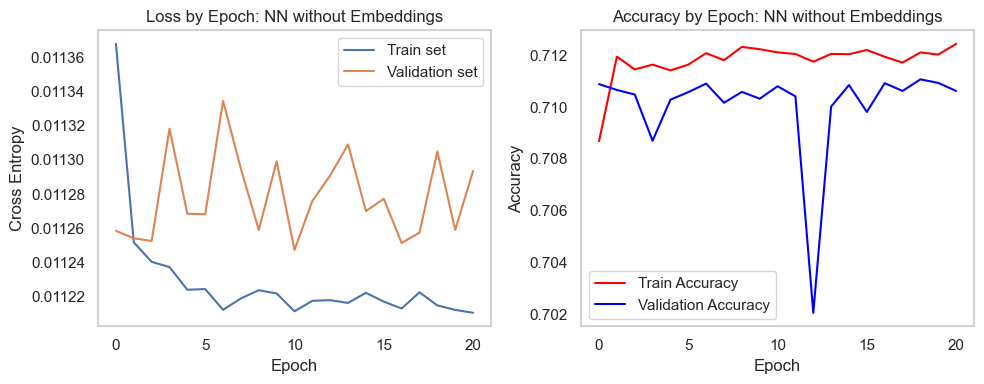

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Grafica loss por epoch
ax1.plot(train_loss_by_epoch, label="Train set")
ax1.plot(val_loss_by_epoch, label="Validation set")
ax1.legend()
ax1.set_title("Loss by Epoch: NN without Embeddings")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Cross Entropy")
ax1.grid()

# Gráfica de precisión por epoch
ax2.plot(train_acc_by_epoch, label="Train Accuracy", color='red')
ax2.plot(val_acc_by_epoch, label="Validation Accuracy", color='blue')
ax2.legend()
ax2.set_title("Accuracy by Epoch: NN without Embeddings")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.grid()

plt.tight_layout()
plt.show()

### 6. PYTORCH MODEL WITH EMBEDDINGS

#### 6.1 Embedding generation

In [51]:
# Transformo IDs a indices (idx) consecutivos para utilizar embeddings
user_id_to_idx = {value:i for i,value in enumerate(User_ID.unique())}
product_id_to_idx = {value:i for i,value in enumerate(Product_ID.unique())}

In [52]:
# Incluyo vector en el dataset
user_id_idx = np.array([user_id_to_idx[value] for value in User_ID])
product_id_idx = np.array([product_id_to_idx[value] for value in Product_ID])

In [53]:
# Divido el vector de indices en entrenamiento y validación
user_id_train_red = user_id_idx[idx_train_red]
user_id_val = user_id_idx[idx_val]

product_id_train_red = product_id_idx[idx_train_red]
product_id_val = product_id_idx[idx_val]

In [54]:
# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbeddings(Dataset):

  def __init__(self, x, user_id_idx, product_id_idx, y):
    self.x = x
    self.user_id_idx = user_id_idx
    self.product_id_idx = product_id_idx
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.user_id_idx[idx], product_id_idx[idx], self.y[idx]

In [55]:
# Creo el dataset de entrenamiento
train_ds_embeddings = MyDatasetWithEmbeddings(X_train_transformed_red.astype(np.float32),
                                            user_id_train_red.astype(np.int64),
                                            product_id_train_red.astype(np.int64),
                                            y_train_red.astype(np.int64)
                                            )

# Creo el dataset de validación
valid_ds_embeddings = MyDatasetWithEmbeddings(X_val_transformed.astype(np.float32),
                                            user_id_val.astype(np.int64),
                                            product_id_val.astype(np.int64),
                                            y_val.astype(np.int64))

# Lo cargo
batch_size = 64
dataloader_train_emb = DataLoader(train_ds_embeddings, batch_size = batch_size, shuffle= True)
dataloader_val_emb = DataLoader(valid_ds_embeddings, batch_size=batch_size)

#### 6.2 Neural Network model

In [56]:
from torch import cat

# Architecture
class NNetWithEmbeddings(nn.Module):
    def __init__(self, n_inputs_by_layer, nuniques_emb = [], emb_dim = 64):
        super(NNetWithEmbeddings, self).__init__()
        self.embeddings = nn.ModuleList()
        self.linear = nn.ModuleList()
        self.activation = nn.ReLU()

        self.n_emb = len(nuniques_emb)                      # Cantidad de embeddings
    
        # Embedding layers
        for i in range(self.n_emb):
            self.embeddings.append(nn.Embedding(num_embeddings=nuniques_emb[i], embedding_dim=emb_dim))

        # Hidden layers
        for i in range(len(n_inputs_by_layer) - 1):
            k = 1 if i ==0 else 0
            self.linear.append(nn.Linear(in_features=n_inputs_by_layer[i] + k * self.n_emb * emb_dim, out_features=n_inputs_by_layer[i + 1], bias=True))

        # Output layer
        self.output = nn.Linear(in_features=n_inputs_by_layer[-1], out_features=nclasses, bias=True)  # Output size igual a n_classes

    def forward(self, x, emb_val):

        for i in range(self.n_emb):
            embedding_output = self.embeddings[i](emb_val[i])
            x = cat([x, embedding_output], dim=1)      # Concatenar x y embeddings_output

        # Forward step
        for i in range(len(self.linear)):
            x = self.linear[i](x)
            x = self.activation(x)
            
        # Output layer
        x = self.output(x)  # No aplicar softmax aquí, se aplica en la pérdida
        return x  # Return Logits

In [57]:
# Definimos parámetros de los embeddings
nuniques_user_id = blacksales_df['User_ID'].nunique()
nuniques_product_id = blacksales_df['Product_ID'].nunique()

emb_dim = 64                                                    # Dimensión del embedding
nuniques_emb = [nuniques_user_id, nuniques_product_id]          # Lista de embeddings

# Instanciamos la red
nnetWithEmbeddings = NNetWithEmbeddings(n_inputs_by_layer, nuniques_emb, emb_dim)

# Función de pérdida y optimizador
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(nnetWithEmbeddings.parameters(), lr=0.0001)


In [58]:
# Mini-batch Algorithm

# Training parameters
epochs = 100        # cantidad de epochs
patience = 10       # early stopping patience

# List initialization
train_loss_by_epoch = []
val_loss_by_epoch = []

train_acc_by_epoch = []
val_acc_by_epoch = []

# Early Stopping parameters
best_val_loss = float('inf')
patience_counter = 0

# Mini-Batch loop
for epoch in range(epochs):

    ############################################
    ## TRAINING
    ############################################
    nnetWithEmbeddings.train(True)

    epoch_loss = 0
    epoch_y_hat = []
    epoch_y = []

    for i, data in enumerate(dataloader_train_emb):
        # Get mini-batch training data
        x_batch, embedd_batch_1, embedd_batch_2, y_batch = data

        # Forward step
        optimizer.zero_grad()
        y_batch_hat = nnetWithEmbeddings(x_batch, [embedd_batch_1, embedd_batch_2])

        # Loss calculation
        loss = loss_function(y_batch_hat, y_batch)

        # Backpropagation step
        loss.backward()
        optimizer.step()

        # Save both true and prediction values for metrics calculations
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(argmax(y_batch_hat, dim=1).detach().cpu().numpy())

        # Cumulative batch loss
        epoch_loss += loss.item()

    # Batch loss mean
    epoch_loss = epoch_loss / len(dataloader_train_emb.dataset)

    # Save epoch loss for plotting
    train_loss_by_epoch.append(epoch_loss)

    # Compute epoch metric
    accuracy = metrics.accuracy_score(epoch_y, epoch_y_hat)

    # Save epoch accuracy for plotting
    train_acc_by_epoch.append(accuracy)

    ############################################
    ## Validation
    ############################################
    nnetWithEmbeddings.eval()  # Set to validation mode

    val_epoch_loss = 0
    val_epoch_y_hat = []
    val_epoch_y = []

    for i, data in enumerate(dataloader_val_emb):
        # Get mini-batch validation data
        x_batch, embedd_batch_1, embedd_batch_2, y_batch = data

        # Forward step
        y_batch_hat = nnetWithEmbeddings(x_batch, [embedd_batch_1, embedd_batch_2])

        # Loss calculation
        loss = loss_function(y_batch_hat, y_batch)

        # Save both true and prediction values for metrics calculations
        val_epoch_y += list(y_batch.detach().cpu().numpy())
        val_epoch_y_hat += list(argmax(y_batch_hat, dim=1).detach().cpu().numpy())

        # Cumulative batch loss
        val_epoch_loss += loss.item()

    # Batch loss mean
    val_epoch_loss = val_epoch_loss / len(dataloader_val_emb.dataset)

    # Save epoch loss for plotting
    val_loss_by_epoch.append(val_epoch_loss)

    # Compute epoch metric
    valid_accuracy = metrics.accuracy_score(val_epoch_y, val_epoch_y_hat)

    # Save epoch accuracy for plotting
    val_acc_by_epoch.append(valid_accuracy)

    ############################################
    ## Print results by epoch
    ############################################
    print(f"Epoch {epoch} | " \
          f"Train/Valid loss: {epoch_loss:.3f} / {val_epoch_loss:.3f} | " \
          f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

    # Early Stopping
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss          # Update best loss
        patience_counter = 0                    # Reset patience counter
    else:
        patience_counter += 1  # Update patience counter

    if patience_counter >= patience:
        print(f"Early stopping triggered after {epoch + 1} epochs.")
        break

Epoch 0 | Train/Valid loss: 0.014 / 0.012 | Train/Valid accuracy: 0.637 / 0.707
Epoch 1 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.710 / 0.709
Epoch 2 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.712 / 0.709
Epoch 3 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.713 / 0.709
Epoch 4 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.714 / 0.708
Epoch 5 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.715 / 0.708
Epoch 6 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.715 / 0.708
Epoch 7 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.717 / 0.705
Epoch 8 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.718 / 0.705
Epoch 9 | Train/Valid loss: 0.011 / 0.011 | Train/Valid accuracy: 0.719 / 0.707
Epoch 10 | Train/Valid loss: 0.011 / 0.012 | Train/Valid accuracy: 0.720 / 0.704
Epoch 11 | Train/Valid loss: 0.011 / 0.012 | Train/Valid accuracy: 0.721 / 0.704
Epoch 12 | Train/Valid loss: 0.011 / 0

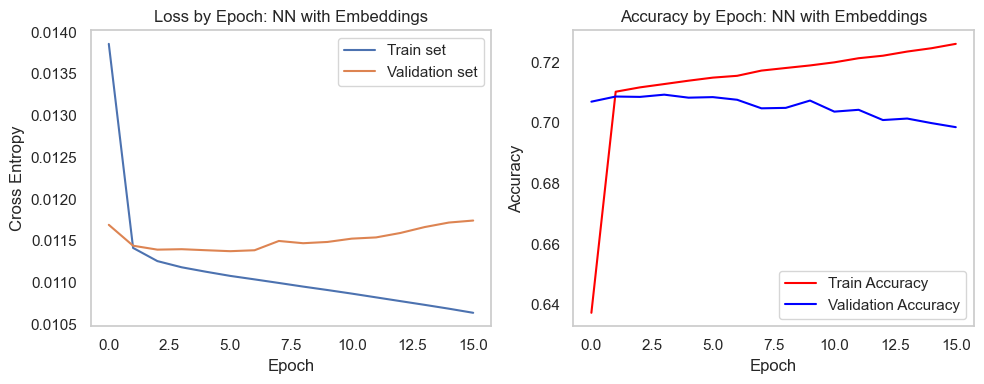

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Grafica loss por epoch
ax1.plot(train_loss_by_epoch, label="Train set")
ax1.plot(val_loss_by_epoch, label="Validation set")
ax1.legend()
ax1.set_title("Loss by Epoch: NN with Embeddings")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Cross Entropy")
ax1.grid()

# Gráfica de precisión por epoch
ax2.plot(train_acc_by_epoch, label="Train Accuracy", color='red')
ax2.plot(val_acc_by_epoch, label="Validation Accuracy", color='blue')
ax2.legend()
ax2.set_title("Accuracy by Epoch: NN with Embeddings")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.grid()

plt.tight_layout()
plt.show()

### 7. MÉTRICAS DE PERFORMANCE

#### 7.1 Predicciones sobre el Test set

In [60]:
from torch import from_numpy
# Predecimos sobre el set de testeo para cada modelo
y_pred_log = log_reg.predict(X_test_transformed)                                        # Base Logistic model

X_test_transformed_tensor = from_numpy(X_test_transformed.astype(np.float32))
nnet.eval()  # Modo de evaluación
with no_grad():
    outputs = nnet(X_test_transformed_tensor)
    y_pred_nn = argmax(outputs, dim=1).cpu().numpy()                                    # Neural network with embeddings


user_id_test = from_numpy(user_id_idx[idx_test].astype(np.int64))
product_id_test = from_numpy(product_id_idx[idx_test].astype(np.int64))
nnet.eval()  # Modo de evaluación
with no_grad():
    outputs = nnetWithEmbeddings(X_test_transformed_tensor, [user_id_test, product_id_test])
    y_pred_nnwe = argmax(outputs, dim=1).cpu().numpy()                                  # Neural network with embeddings

#### 7.2 Confusión

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veamos la matriz de confusión para cada modelo
cm_log = confusion_matrix(y_test, y_pred_log, labels=log_reg.classes_)                     # Base Logistic model
cm_nn = confusion_matrix(y_test, y_pred_nn, labels=classes_values)                         # Neural network without embeddings
cm_nnwe = confusion_matrix(y_test, y_pred_nnwe, labels=classes_values)                     # Neural network without embeddings

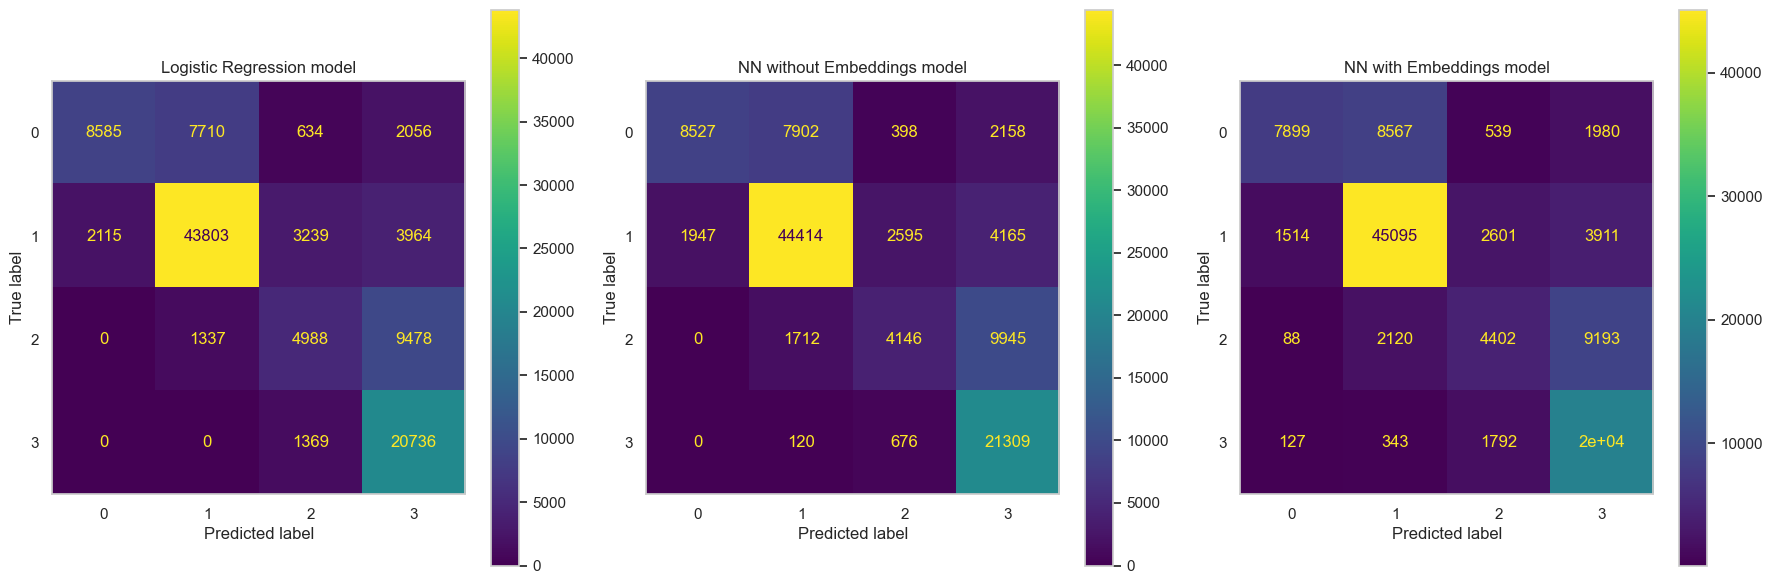

In [62]:
# Crear una figura con subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# ----------------------------------------------------------------
# Logistic Regression
# ----------------------------------------------------------------

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp.plot(ax=axs[0])
axs[0].set_title("Logistic Regression model")
axs[0].grid(False)

# # ----------------------------------------------------------------
# # Neural Network without Embeddings
# # ----------------------------------------------------------------

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=classes_values)
disp.plot(ax=axs[1])
axs[1].set_title("NN without Embeddings model")
axs[1].grid(False)

# # ----------------------------------------------------------------
# # Neural Network with Embeddings
# # ----------------------------------------------------------------

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nnwe, display_labels=classes_values)
disp.plot(ax=axs[2])
axs[2].set_title("NN with Embeddings model")
axs[2].grid(False)

plt.tight_layout()
plt.show()

### Observaciones

- En términos generales, los 3 modelos tienen una performance similar, siendo el costo computacional de la Regresión Logistica es sumamente inferior al de ambas redes neuronales.

#### 7.3 Evaluación de métricas

In [65]:
# Veamos algunas métricas
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
raw_data = []

# ----------------------------------------------------------------
# Logistic Regression
# ----------------------------------------------------------------

print("Logistic Regression model")
print("\n")
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")
print("\n")

# ----------------------------------------------------------------
# Neural Network without Embeddings
# ----------------------------------------------------------------

print("Neural Network without Embeddings model")
print("\n")
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn, average='weighted')
recall = recall_score(y_test, y_pred_nn, average='weighted')
f1 = f1_score(y_test, y_pred_nn, average='weighted')

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")
print("\n")

# ----------------------------------------------------------------
# Neural Network with Embeddings
# ----------------------------------------------------------------

print("Neural Network with Embeddings model")
print("\n")
accuracy = accuracy_score(y_test, y_pred_nnwe)
precision = precision_score(y_test, y_pred_nnwe, average='weighted')
recall = recall_score(y_test, y_pred_nnwe, average='weighted')
f1 = f1_score(y_test, y_pred_nnwe, average='weighted')

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")
print("\n")

Logistic Regression model


La exactitud de clasificación es: 0.7100187248895595
F1-score de testeo fue: 0.696873687974807
Precisión de testeo fue: 0.7236854811327659
Recall de testeo fue: 0.7100187248895595


Neural Network without Embeddings model


La exactitud de clasificación es: 0.7126002145181523
F1-score de testeo fue: 0.693660811670909
Precisión de testeo fue: 0.7266939299354168
Recall de testeo fue: 0.7126002145181523


Neural Network with Embeddings model


La exactitud de clasificación es: 0.7020833712073009
F1-score de testeo fue: 0.6840388385998827
Precisión de testeo fue: 0.7114397638383085
Recall de testeo fue: 0.7020833712073009




### 8. FUNCIÓN PARA ENCONTRAR USUARIOS SIMILARES CON EMBEDDINGS

In [80]:
from torch import cosine_similarity, tensor, argsort, stack

def get_similar_users(user_id, n, user_id_to_idx, embeddings_layer):
    # Verificar que el ID del usuario existe en el conjunto de datos
    if user_id not in user_id_to_idx:
        raise ValueError("El ID de usuario no existe en el conjunto de datos.")
    
    # Obtener el índice del usuario
    user_idx = user_id_to_idx[user_id]
    
    # Obtener el embedding del usuario
    user_embedding = embeddings_layer.weight[user_idx]  # Embedding del usuario solicitado
    
    # Obtener todos los embeddings de usuarios
    all_user_embeddings = embeddings_layer.weight  # Todos los embeddings de usuarios
    
    # Calcular similitud del coseno entre el embedding del usuario y todos los demás
    similarities = cosine_similarity(user_embedding.unsqueeze(0), all_user_embeddings)
    
    # Crear una lista de tensores para las similaridades con sus índices
    user_similarities = []
    for idx in range(all_user_embeddings.size(0)):
        user_similarities.append(tensor([idx, similarities[idx]]))  # [(index, similarity), ...]

    # Convertir la lista a un tensor bidimensional
    user_similarities = stack(user_similarities)  # Usar stack para crear un tensor 2D

    # Excluir el usuario actual de la lista
    user_similarities = user_similarities[user_similarities[:, 0] != user_idx]
    
    # Ordenar por similitud
    sorted_similarities = user_similarities[argsort(user_similarities[:, 1], descending=True)]
    
    # Obtener los n usuarios más similares
    similar_user_indices = sorted_similarities[:n, 0].long()  # Solo los índices de los usuarios similares
    
    # Convertir índices de vuelta a ID de usuario
    similar_user_ids = [list(user_id_to_idx.keys())[idx.item()] for idx in similar_user_indices]
    
    return similar_user_ids

In [81]:
# Aplicación...
user_id = blacksales_df['User_ID'].iloc[1]  # ID del usuario que deseas buscar
n = 5          # Número de usuarios similares a sugerir
similar_users = get_similar_users(user_id, n, user_id_to_idx, nnetWithEmbeddings.embeddings[0])

print(f"Usuarios similares a {user_id}: {similar_users}")

Usuarios similares a 1000001: [1005320, 1003892, 1001597, 1000189, 1001367]
